Модуль А

Подключаем библиотеки

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import datetime
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

Загружаем данные

In [ ]:
data = pd.read_csv("projects.csv", delimiter=",")

Знакомимся со структурой датасета. Можем заметить, что в наборе данных присутствуют как числовые, так и категориальные признаки, а также признаки формата datetime.

In [ ]:
data.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


Во всех столбцах одинаковое количество ненулевых значений. В датасете присутствуют значения типа object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


Статистический анализ переменных

In [ ]:
data.describe()

,ID,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000


Выводим количество пропущеных значений каждого признака.

In [ ]:
data.isnull().sum()

ID             0
Name           0
Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
dtype: int64

Выведем уникальные значения

In [ ]:
data.value_counts()

ID          Name                                                          Category      Subcategory   Country         Launched             Deadline    Goal   Pledged  Backers  State     
5971        An American Apocalypse: The Reckoning                         Comics        Comics        United States   2012-06-08 18:46:56  2012-08-06  48000  376      7        Failed        1
1432599776  Sky Siouki - Luxury Printed Textile Products                  Crafts        Crafts        United Kingdom  2014-01-07 18:34:56  2014-02-01  816    198      10       Failed        1
1432588016  Infidel 13 - Afghanistan, Conquered but never Changed         Publishing    Nonfiction    United States   2016-02-16 23:04:26  2016-03-17  10000  41       5        Failed        1
1432586065  Boston kids telling their stories through camera's            Film & Video  Documentary   United States   2016-08-02 03:23:42  2016-10-01  10000  50       2        Failed        1
1432579225  Run Far, Run Fast short movie!   

Можем вывести признаки и их коэффициент корреляции. Наибольший наблюдается у Backers и Pledged.

<ipython-input-9-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

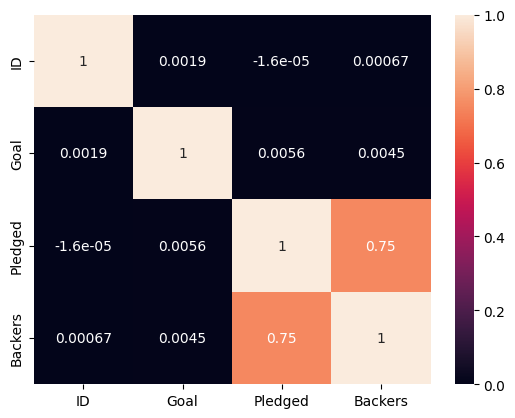

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
new_data = data.copy()

Удалим дубликаты.

In [ ]:
new_data.drop_duplicates()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live


Закодируем признаки Category, Subcategory, Country, State. Эти признаки были отнесены к категориальным из-за своего небольшого количества уникальных значений. Для кодировки будем использовать LabelEncoder

In [ ]:
new_data['Category'].value_counts()

Film & Video    62694
Music           49529
Publishing      39378
Games           35225
Technology      32562
Design          30065
Art             28151
Food            24599
Fashion         22812
Theater         10911
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: Category, dtype: int64

In [ ]:
new_data['Subcategory'].value_counts()

Product Design     22310
Documentary        16138
Tabletop Games     14178
Music              13339
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: Subcategory, Length: 159, dtype: int64

In [ ]:
new_data['Country'].value_counts()

United States     292618
United Kingdom     33671
Canada             14756
Australia           7839
Germany             4171
France              2939
Italy               2878
Netherlands         2868
Spain               2276
Sweden              1757
Mexico              1752
New Zealand         1447
Denmark             1113
Ireland              811
Switzerland          760
Norway               708
Hong Kong            618
Belgium              617
Austria              597
Singapore            555
Luxembourg            62
Japan                 40
Name: Country, dtype: int64

In [ ]:
new_data['State'].value_counts()

Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: State, dtype: int64

In [ ]:
labelencoder = LabelEncoder()
data_new = labelencoder.fit_transform(new_data['Category'].values)
new_data['Category'] = data_new

In [ ]:
labelencoder2 = LabelEncoder()
data_new2 = labelencoder2.fit_transform(new_data['Subcategory'].values)
new_data['Subcategory'] = data_new2

In [ ]:
labelencoder3 = LabelEncoder()
data_new3 = labelencoder3.fit_transform(new_data['Country'].values)
new_data['Country'] = data_new3

In [ ]:
labelencoder4 = LabelEncoder()
data_new4 = labelencoder4.fit_transform(new_data['State'].values)
new_data['State'] = data_new4

In [ ]:
new_data

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,5,52,21,2009-04-21 21:02:48,2009-05-31,1000,625,30,1
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,6,129,21,2009-04-23 00:07:53,2009-07-20,80000,22,3,1
2,1703704063,drawing for dollars,0,70,21,2009-04-24 21:52:03,2009-05-03,20,35,3,3
3,727286,Offline Wikipedia iPhone app,13,131,21,2009-04-25 17:36:21,2009-07-14,99,145,25,3
4,1622952265,Pantshirts,5,52,21,2009-04-27 14:10:39,2009-05-26,1900,387,10,1
...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,10,68,21,2018-01-02 14:13:09,2018-01-16,500,0,0,2
374849,974738310,EVO Planner: The World's First Personalized Fl...,4,113,21,2018-01-02 14:15:38,2018-02-09,15000,269,8,2
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",7,58,21,2018-01-02 14:17:46,2018-01-16,10000,165,3,2
374851,1830173355,Digital Dagger Coin,0,10,21,2018-01-02 14:38:17,2018-02-01,650,7,1,2


Разделим столбец Deadline на три столбца с годом, месяцем и днем. После разделения удалим старый столбец.

In [ ]:
new_data['Deadline'] = pd.to_datetime(new_data['Deadline'])

new_data['DeadlineDay'] = new_data['Deadline'].dt.day
new_data['DeadlineMonth'] = new_data['Deadline'].dt.month
new_data['DeadlineYear'] = new_data['Deadline'].dt.year

new_data = new_data.drop(['Deadline'], axis=1)

In [ ]:
new_data

,ID,Name,Category,Subcategory,Country,Launched,Goal,Pledged,Backers,State,DeadlineDay,DeadlineMonth,DeadlineYear
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,5,52,21,2009-04-21 21:02:48,1000,625,30,1,31,5,2009
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,6,129,21,2009-04-23 00:07:53,80000,22,3,1,20,7,2009
2,1703704063,drawing for dollars,0,70,21,2009-04-24 21:52:03,20,35,3,3,3,5,2009
3,727286,Offline Wikipedia iPhone app,13,131,21,2009-04-25 17:36:21,99,145,25,3,14,7,2009
4,1622952265,Pantshirts,5,52,21,2009-04-27 14:10:39,1900,387,10,1,26,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,10,68,21,2018-01-02 14:13:09,500,0,0,2,16,1,2018
374849,974738310,EVO Planner: The World's First Personalized Fl...,4,113,21,2018-01-02 14:15:38,15000,269,8,2,9,2,2018
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",7,58,21,2018-01-02 14:17:46,10000,165,3,2,16,1,2018
374851,1830173355,Digital Dagger Coin,0,10,21,2018-01-02 14:38:17,650,7,1,2,1,2,2018


Теперь поработаем со столбцом Launched. Первым шагом будет отделение даты от времени.

In [ ]:
new_data['Launched'] = pd.to_datetime(new_data['Launched'],  errors='coerce')

new_data["LaunchedDate"] = new_data["Launched"].dt.date
new_data["LaunchedTime"] = new_data["Launched"].dt.time
new_data = new_data.drop(['Launched'], axis=1)
new_data

,ID,Name,Category,Subcategory,Country,Goal,Pledged,Backers,State,DeadlineDay,DeadlineMonth,DeadlineYear,LaunchedDate,LaunchedTime
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,5,52,21,1000,625,30,1,31,5,2009,2009-04-21,21:02:48
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,6,129,21,80000,22,3,1,20,7,2009,2009-04-23,00:07:53
2,1703704063,drawing for dollars,0,70,21,20,35,3,3,3,5,2009,2009-04-24,21:52:03
3,727286,Offline Wikipedia iPhone app,13,131,21,99,145,25,3,14,7,2009,2009-04-25,17:36:21
4,1622952265,Pantshirts,5,52,21,1900,387,10,1,26,5,2009,2009-04-27,14:10:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,10,68,21,500,0,0,2,16,1,2018,2018-01-02,14:13:09
374849,974738310,EVO Planner: The World's First Personalized Fl...,4,113,21,15000,269,8,2,9,2,2018,2018-01-02,14:15:38
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",7,58,21,10000,165,3,2,16,1,2018,2018-01-02,14:17:46
374851,1830173355,Digital Dagger Coin,0,10,21,650,7,1,2,1,2,2018,2018-01-02,14:38:17


Работа с датой производится аналогично представленной выше.

In [ ]:
new_data['LaunchedDate'] = pd.to_datetime(new_data['LaunchedDate'])

new_data['LaunchedDay'] = new_data['LaunchedDate'].dt.day
new_data['LaunchedMonth'] = new_data['LaunchedDate'].dt.month
new_data['LaunchedYear'] = new_data['LaunchedDate'].dt.year

new_data = new_data.drop(['LaunchedDate'], axis=1)
new_data

,ID,Name,Category,Subcategory,Country,Goal,Pledged,Backers,State,DeadlineDay,DeadlineMonth,DeadlineYear,LaunchedTime,LaunchedDay,LaunchedMonth,LaunchedYear
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,5,52,21,1000,625,30,1,31,5,2009,21:02:48,21,4,2009
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,6,129,21,80000,22,3,1,20,7,2009,00:07:53,23,4,2009
2,1703704063,drawing for dollars,0,70,21,20,35,3,3,3,5,2009,21:52:03,24,4,2009
3,727286,Offline Wikipedia iPhone app,13,131,21,99,145,25,3,14,7,2009,17:36:21,25,4,2009
4,1622952265,Pantshirts,5,52,21,1900,387,10,1,26,5,2009,14:10:39,27,4,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,10,68,21,500,0,0,2,16,1,2018,14:13:09,2,1,2018
374849,974738310,EVO Planner: The World's First Personalized Fl...,4,113,21,15000,269,8,2,9,2,2018,14:15:38,2,1,2018
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",7,58,21,10000,165,3,2,16,1,2018,14:17:46,2,1,2018
374851,1830173355,Digital Dagger Coin,0,10,21,650,7,1,2,1,2,2018,14:38:17,2,1,2018


Чтобы представить столбец со временем в корректном виде, приведем к строковому типу и разделим на три соответствующих столбца.

In [ ]:
new_data['LaunchedTime'] = new_data['LaunchedTime'].astype(str)

In [ ]:
new_data[['LaunchedHour', 'LaunchedMinute', 'LaunchedSecond']] = new_data['LaunchedTime'].str.split(':', 2, expand=True)

<ipython-input-26-7b8c884bfc99>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  new_data[['LaunchedHour', 'LaunchedMinute', 'LaunchedSecond']] = new_data['LaunchedTime'].str.split(':', 2, expand=True)


In [ ]:
new_data = new_data.drop(['LaunchedTime'], axis=1)
new_data

,ID,Name,Category,Subcategory,Country,Goal,Pledged,Backers,State,DeadlineDay,DeadlineMonth,DeadlineYear,LaunchedDay,LaunchedMonth,LaunchedYear,LaunchedHour,LaunchedMinute,LaunchedSecond
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,5,52,21,1000,625,30,1,31,5,2009,21,4,2009,21,02,48
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,6,129,21,80000,22,3,1,20,7,2009,23,4,2009,00,07,53
2,1703704063,drawing for dollars,0,70,21,20,35,3,3,3,5,2009,24,4,2009,21,52,03
3,727286,Offline Wikipedia iPhone app,13,131,21,99,145,25,3,14,7,2009,25,4,2009,17,36,21
4,1622952265,Pantshirts,5,52,21,1900,387,10,1,26,5,2009,27,4,2009,14,10,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,10,68,21,500,0,0,2,16,1,2018,2,1,2018,14,13,09
374849,974738310,EVO Planner: The World's First Personalized Fl...,4,113,21,15000,269,8,2,9,2,2018,2,1,2018,14,15,38
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",7,58,21,10000,165,3,2,16,1,2018,2,1,2018,14,17,46
374851,1830173355,Digital Dagger Coin,0,10,21,650,7,1,2,1,2,2018,2,1,2018,14,38,17


Спорным был признак Name. Проверим содержит ли он только уникальные значения.

In [ ]:
new_data['Name'].value_counts()

New EP/Music Development                                        13
Canceled (Canceled)                                             13
N/A (Canceled)                                                  11
Music Video                                                     11
Cancelled (Canceled)                                            10
                                                                ..
The Mini Box - Simple Storage Solution                           1
GuLish Clothing™                                                 1
The Traveling Crafter(tm) - Independently Produced TV Series     1
GENESIS OPERA                                                    1
Spirits of the Forest                                            1
Name: Name, Length: 372061, dtype: int64

Признак не содержит только уникальные значения. Будем рассматривать его как категорию.

In [ ]:
labelencoder5 = LabelEncoder()
data_new5 = labelencoder5.fit_transform(new_data['Name'].values)
new_data['Name'] = data_new5
new_data

,ID,Name,Category,Subcategory,Country,Goal,Pledged,Backers,State,DeadlineDay,DeadlineMonth,DeadlineYear,LaunchedDay,LaunchedMonth,LaunchedYear,LaunchedHour,LaunchedMinute,LaunchedSecond
0,1860890148,130454,5,52,21,1000,625,30,1,31,5,2009,21,4,2009,21,02,48
1,709707365,63196,6,129,21,80000,22,3,1,20,7,2009,23,4,2009,00,07,53
2,1703704063,365635,0,70,21,20,35,3,3,3,5,2009,24,4,2009,21,52,03
3,727286,217100,13,131,21,99,145,25,3,14,7,2009,25,4,2009,17,36,21
4,1622952265,225555,5,52,21,1900,387,10,1,26,5,2009,27,4,2009,14,10,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,31198,10,68,21,500,0,0,2,16,1,2018,2,1,2018,14,13,09
374849,974738310,99394,4,113,21,15000,269,8,2,9,2,2018,2,1,2018,14,15,38
374850,2106246194,143256,7,58,21,10000,165,3,2,16,1,2018,2,1,2018,14,17,46
374851,1830173355,91780,0,10,21,650,7,1,2,1,2,2018,2,1,2018,14,38,17


Все признаки разделены и приведены к числовому виду. Зададим тип float для дальнейшей работы.

In [ ]:
new_data = new_data.astype(float)

Проверим корректен ли тип данных в датасете.

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              374853 non-null  float64
 1   Name            374853 non-null  float64
 2   Category        374853 non-null  float64
 3   Subcategory     374853 non-null  float64
 4   Country         374853 non-null  float64
 5   Goal            374853 non-null  float64
 6   Pledged         374853 non-null  float64
 7   Backers         374853 non-null  float64
 8   State           374853 non-null  float64
 9   DeadlineDay     374853 non-null  float64
 10  DeadlineMonth   374853 non-null  float64
 11  DeadlineYear    374853 non-null  float64
 12  LaunchedDay     374853 non-null  float64
 13  LaunchedMonth   374853 non-null  float64
 14  LaunchedYear    374853 non-null  float64
 15  LaunchedHour    374853 non-null  float64
 16  LaunchedMinute  374853 non-null  float64
 17  LaunchedSe

In [ ]:
new_data.to_csv(r'modified_projects.csv', index= False)

Модуль B

Проведем балансировку классов с помощью метода NearMiss.

In [ ]:
new_data['State'].value_counts()

1.0    197611
3.0    133851
0.0     38751
2.0      2798
4.0      1842
Name: State, dtype: int64

In [ ]:
Y = new_data['State']
X = new_data.drop('State', axis=1)
feature_names = X.columns

In [ ]:
print('Размерность набора данных X_train: ', X.shape)
print('Размерность набора данных Y_train: ', Y.shape)

Размерность набора данных X_train:  (374853, 17)
Размерность набора данных Y_train:  (374853,)


In [ ]:
print('Перед применением метода кол-во меток со значением 0: {}'.format(sum(Y == 0)))
print('Перед применением метода кол-во меток со значением 1: {}'.format(sum(Y == 1)))
print('Перед применением метода кол-во меток со значением 2: {}'.format(sum(Y == 2)))
print('Перед применением метода кол-во меток со значением 3: {}'.format(sum(Y == 3)))
print('Перед применением метода кол-во меток со значением 4: {}'.format(sum(Y == 4)))

Перед применением метода кол-во меток со значением 0: 38751
Перед применением метода кол-во меток со значением 1: 197611
Перед применением метода кол-во меток со значением 2: 2798
Перед применением метода кол-во меток со значением 3: 133851
Перед применением метода кол-во меток со значением 4: 1842


In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_train_miss, Y_train_miss = nm.fit_resample(X, Y.ravel())

In [ ]:
print('Перед применением метода кол-во меток со значением 0: {}'.format(sum(Y_train_miss == 0)))
print('Перед применением метода кол-во меток со значением 1: {}'.format(sum(Y_train_miss == 1)))
print('Перед применением метода кол-во меток со значением 2: {}'.format(sum(Y_train_miss == 2)))
print('Перед применением метода кол-во меток со значением 3: {}'.format(sum(Y_train_miss == 3)))
print('Перед применением метода кол-во меток со значением 4: {}'.format(sum(Y_train_miss == 4)))

Перед применением метода кол-во меток со значением 0: 1842
Перед применением метода кол-во меток со значением 1: 1842
Перед применением метода кол-во меток со значением 2: 1842
Перед применением метода кол-во меток со значением 3: 1842
Перед применением метода кол-во меток со значением 4: 1842


Проведем масштабирование данных.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train_miss)

data_classifier = scaler.transform(X_train_miss)
data_classifier = pd.DataFrame(data_classifier)
data_classifier

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.200725,0.369558,0.357143,0.329114,1.000000,0.000007,0.000026,0.000242,0.966667,0.000000,0.555556,1.000000,1.000000,0.444444,0.826087,0.389831,0.762712
1,0.200738,0.338636,0.142857,0.854430,0.952381,0.000008,0.000000,0.000000,0.233333,0.727273,0.555556,0.366667,0.636364,0.555556,0.695652,0.593220,1.000000
2,0.373760,0.190943,0.714286,0.455696,1.000000,0.000035,0.000000,0.000000,0.133333,0.181818,0.222222,0.600000,0.000000,0.222222,0.043478,0.423729,0.813559
3,0.610814,0.331817,0.071429,0.164557,1.000000,0.000040,0.000045,0.000145,0.900000,0.272727,0.222222,0.233333,0.181818,0.222222,0.826087,0.508475,0.322034
4,0.281796,0.904453,0.928571,0.360759,1.000000,0.000100,0.000075,0.000824,0.700000,0.363636,0.666667,0.700000,0.272727,0.666667,0.130435,0.830508,0.305085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9205,0.109833,0.605562,0.500000,0.367089,1.000000,0.000300,0.000104,0.000145,0.366667,0.000000,1.000000,0.400000,1.000000,0.888889,0.608696,0.796610,0.932203
9206,0.421854,0.297673,0.571429,0.860759,0.333333,0.000038,0.000477,0.002860,0.200000,0.000000,1.000000,0.400000,1.000000,0.888889,0.913043,0.474576,0.898305
9207,0.370435,0.660259,0.857143,0.341772,1.000000,0.000050,0.000025,0.000048,0.466667,0.090909,1.000000,0.533333,1.000000,0.888889,1.000000,0.593220,0.728814
9208,0.681300,0.089964,0.571429,0.670886,0.285714,0.000425,0.000000,0.000000,1.000000,0.000000,1.000000,0.566667,1.000000,0.888889,0.695652,0.830508,0.694915


Для отбора наиболее подходящего количества признаков построим функцию test.

In [ ]:
def test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
  bag = BaggingClassifier().fit(X_train, y_train)
  print(classification_report(y_test, bag.predict(X_test)))

Проанализируем стандартное отклонение признаков и выберем с наибольшим разбросом.


In [ ]:
data_classifier.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000,9210.000000
mean,0.532981,0.509377,0.539297,0.513161,0.869200,0.000482,0.001392,0.003390,0.474220,0.421765,0.691519,0.479294,0.586921,0.663856,0.564184,0.480990,0.494566
std,0.269291,0.269484,0.280226,0.287741,0.286708,0.015435,0.011722,0.018588,0.298498,0.340867,0.240980,0.292073,0.336803,0.218742,0.330696,0.304276,0.294213
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.293085,0.290622,0.357143,0.259494,0.952381,0.000020,0.000001,0.000048,0.200000,0.090909,0.555556,0.233333,0.272727,0.555556,0.217391,0.220339,0.237288
50%,0.541596,0.507425,0.571429,0.531646,1.000000,0.000058,0.000080,0.000339,0.466667,0.363636,0.666667,0.466667,0.636364,0.666667,0.695652,0.474576,0.491525
75%,0.789126,0.727683,0.785714,0.759494,1.000000,0.000165,0.000712,0.001987,0.733333,0.727273,0.888889,0.733333,0.909091,0.888889,0.826087,0.745763,0.745763
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Можем сделать вывод, что наиболее информативными являтся признаки, у которых std выше 0.21. Оставим 14 признаков. Проверим теорию при помощи метода PCA.

Проверим качество до и после уменьшения размерности.

In [ ]:
pca = PCA(n_components=16)
X_pca = pca.fit_transform(data_classifier)

In [ ]:
test(data_classifier, Y_train_miss)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.75      0.97      0.85       921
         4.0       0.00      0.00      0.00      1842

    accuracy                           0.32      2763
   macro avg       0.15      0.19      0.17      2763
weighted avg       0.25      0.32      0.28      2763



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
test(X_pca, Y_train_miss)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.67      0.54      0.59       921
         4.0       0.00      0.00      0.00      1842

    accuracy                           0.18      2763
   macro avg       0.13      0.11      0.12      2763
weighted avg       0.22      0.18      0.20      2763



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Мы можем заметить резкое падение качества модели при понижении размерности на 1. Поэтому оставим исходную размерность и будем работать с ней. Будем использовать классическое разделение обучающей и тестовой выборки 70% и 30% соответственно.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_classifier, Y_train_miss, test_size=0.3, shuffle=False)

Проведем анализ моделей. Былы взяты модель KNN, GaussianNB, StackingClassifier, GradientBoostingClassifier. Был выбран GradientBoostingClassifier.


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
knn.fit(X_train, y_train)

y_bin_knn_pred = knn.predict(X_test)
print(classification_report(y_test, y_bin_knn_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.44      0.13      0.20       921
         4.0       0.00      0.00      0.00      1842

    accuracy                           0.04      2763
   macro avg       0.09      0.03      0.04      2763
weighted avg       0.15      0.04      0.07      2763



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.65      0.38      0.48       921
         4.0       0.00      0.00      0.00      1842

    accuracy                           0.13      2763
   macro avg       0.13      0.08      0.10      2763
weighted avg       0.22      0.13      0.16      2763



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
estimators = [
            ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
            ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]

clf_stc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf_stc.fit(X_train, y_train)
y_pred_stc = clf_stc.predict(X_test)
print(classification_report(y_test, y_pred_stc))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.75      0.92      0.83       921
         4.0       0.00      0.00      0.00      1842

    accuracy                           0.31      2763
   macro avg       0.15      0.18      0.17      2763
weighted avg       0.25      0.31      0.28      2763



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/loc

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.4, max_depth=3, random_state=0)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.76      0.97      0.85       921
         4.0       0.00      0.00      0.00      1842

    accuracy                           0.32      2763
   macro avg       0.15      0.19      0.17      2763
weighted avg       0.25      0.32      0.28      2763



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Проводим тонкую настройку алгоритма с помощью GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'n_estimators' : [50, 100, 200]},
  {'learning_rate' : [0.2, 0.4, 0.6]},
 ]

optimizer = GridSearchCV(GradientBoostingClassifier(), param_grid, n_jobs=-1, cv=2)

optimizer.fit(X_train, y_train)

print(optimizer.best_score_)
print(optimizer.best_params_)

0.7816041783274525
{'learning_rate': 0.2}


In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=3, random_state=0)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.76      0.97      0.85       921
         4.0       0.00      0.00      0.00      1842

    accuracy                           0.32      2763
   macro avg       0.15      0.19      0.17      2763
weighted avg       0.25      0.32      0.28      2763



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
import pickle
filename = 'GradientBoostingClassifier.sav'
pickle.dump(gb_clf, open(filename, 'wb'))

Модуль C

In [ ]:
! pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%writefile app.py
import pickle
import tensorflow as tf

import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


def main():
  GradientBoostingClassifier = pickle.load(open("GradientBoostingClassifier.sav", 'rb'))
  data = pd.read_csv("projects.csv")

  page = st.sidebar.selectbox(
    "Выберите страницу",
    ["Информация о данных", "Визуализация данных", "Предсказания моделей"]
  )

  if page == "Информация о данных":
    st.title("Анализ данных")
    st.subheader('Чему посвящен датасет')
    st.markdown('Модель была обучена на наборе данных *Projects*.')
    st.markdown('В разных ситуациях люди и компании могут заниматься краундфайдингом - искать финансирование своим проектам.')
    st.markdown('Набор данных содержит информацию о различных проектах, которая включает в себя название, категорию и подкатегорию, страну, количество людей, которые помогли проекту финансово, и другую информацию.')
    st.markdown('Необходимо предсказать одно из пяти состояний проекта в данный момент времени (*Canceled*, *Failed*, *Live*, *Successful*, *Suspended*).')
    st.markdown('Фрагмент датасета представлен ниже.')
    st.write(data.head())

    st.subheader('Признаки')
    st.markdown('+ *ID*: ID проекта')
    st.markdown('+ *Name*: название проекта')
    st.markdown('+ *Category*: название категории')
    st.markdown('+ *Subcategory*: название подкатегории')
    st.markdown('+ *Country*: страна')
    st.markdown('+ *Launched*: дата запуска')
    st.markdown('+ *Deadline*: крайний срок')
    st.markdown('+ *Goal*: цель')
    st.markdown('+ *Pledged*: залог')
    st.markdown('+ *Backers*: сторонники')
    st.markdown('+ *State*: состояние')

    st.subheader('Особенности предобработки данных')
    st.text('Можно выделить несколько этапов:')
    st.markdown('1. Удаление дубликатов.')
    st.markdown('2. *LabelEncoder* категориальных признаков. В них входят: *Category*, *Subcategory*, *Country*, *State*, *Name*.')
    st.markdown('3. Обработка признаков *Launched* и *Deadline*, которые содержат дату и время.')
    st.markdown('5. Приведение всех данных к типу *float*.')
    st.markdown('6. Балансировка.')
    st.markdown('7. Масштабирование признаков.')
    data1 = pd.read_csv("modified_projects.csv")

    st.text('Фрагмент обработанного датасета для обучения моделей представлен ниже.')
    st.write(data1.head())


  elif page == "Визуализация данных":
    st.title("Визуализация данных")
    char_select = st.selectbox(
      label='Выберите тип визуализации данных',
      options=['Диаграмма рассеяния', 'Линейная диаграмма', 'Гистограмма', 'Коробочный график']
    )

    numeric_columns = list(data.columns)

    if char_select == 'Диаграмма рассеяния':
      x_value = st.selectbox('Ось x: ', options=numeric_columns)
      y_value = st.selectbox('Ось y: ', options=numeric_columns)
      title = 'Диаграмма рассеяния признака ' + x_value + ' и признака ' + y_value
      plot1 = px.scatter(data, x=x_value, y=y_value, title=title)
      st.plotly_chart(plot1)
    if char_select == 'Линейная диаграмма':
      x_value = st.selectbox('Ось x: ', options=numeric_columns)
      y_value = st.selectbox('Ось y: ', options=numeric_columns)
      title = 'Линейная диаграмма зависимости признака ' + x_value + ' и признака ' + y_value
      plot2 = px.line(data, x=x_value, y=y_value, title=title)
      st.plotly_chart(plot2)
    if char_select == 'Гистограмма':
      x_value = st.selectbox('Выберите признак: ', options=numeric_columns)
      title = 'Гистограмма признака ' + x_value
      plot3 = px.line(data, x=x_value, title=title)
      st.plotly_chart(plot3)
    if char_select == 'Коробочный график':
      x_value = st.selectbox('Ось x: ', options=numeric_columns)
      y_value = st.selectbox('Ось y: ', options=numeric_columns)
      title = 'Коробочный график зависимости признака ' + x_value + ' и признака ' + y_value
      plot4 = px.box(data, x=x_value, y=y_value, )
      st.plotly_chart(plot4)

  elif page == "Предсказания моделей":
    st.title("Предсказания моделей")

    def prediction(input_data, nameModel):
      numpy_data= np.asarray(input_data, dtype = float)
      input_reshaped = numpy_data.reshape(1, -1)
      prediction = GradientBoostingClassifier.predict(input_reshaped)

      if (prediction == 0):
        st.success('Failed')
      elif (prediction == 1):
        st.warning('Successful')
      elif (prediction == 2):
        st.warning('Canceled')
      elif (prediction == 3):
        st.warning('Live')
      else:
        st.warning('Suspended')

    st.markdown('Перед заполенением необходимо ознакомится с признаковым пространством на странице *Информация о данных*.')

    ID = st.text_input('ID')
    Name = st.text_input('Name')
    Category = st.text_input('Category')
    Subcategory = st.text_input('Subcategory')
    Country = st.text_input('Country')
    Goal = st.text_input('Goal')
    Pledged = st.text_input('Pledged')
    Backers = st.text_input('Backers')

    DeadlineDay = st.text_input('DeadlineDay')
    DeadlineMonth = st.text_input('DeadlineMonth')
    DeadlineYear = st.text_input('DeadlineYear')

    LaunchedDay = st.text_input('LaunchedDay')
    LaunchedMonth	= st.text_input('LaunchedMonth')
    LaunchedYear = st.text_input('LaunchedYear')

    LaunchedHour = st.text_input('LaunchedHour')
    LaunchedMinute = st.text_input('LaunchedMinute')
    LaunchedSecond = st.text_input('LaunchedSecond')

    result = ''
    if st.button('Результат'):
      result = prediction([ID, Name, Category, Subcategory, Country, Goal, Pledged, Backers, DeadlineDay, DeadlineMonth, DeadlineYear, LaunchedDay, LaunchedMonth, LaunchedYear, LaunchedHour, LaunchedMinute, LaunchedSecond])

if __name__ == "__main__":
    main()


Overwriting app.py


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.852s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
! curl https://ipinfo.io/ip

35.227.87.236

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
! fuser -k 8501/tcp

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 4.531s
your url is: https://plenty-turkeys-travel.loca.lt
^C
